# Unit 4: Smarter Models – Trees and Forests + Overfitting and Underfitting

---

## Lesson 4.3: Random Forests

We learned that **Decision Trees** are smart, they split data by asking good questions.  
But one tree can sometimes make mistakes, especially if the data is noisy.

A **Random Forest** is a model made of **many decision trees** working together

### Why Use Many Trees?

Imagine asking 1 person to guess if someone will survive the Titanic.  
Now then imagine asking 100 people, and going with the **majority vote**.  
That’s what a random forest is

More trees = more opinions = better decisions

---

### How Does a Random Forest Work?

1. It creates **lots of decision trees**.
2. Each tree gets a **random sample** of the data.
3. Each tree sees only **some features** (like age, fare, etc.).
4. Each tree makes a **prediction**.
5. The forest takes a **vote** (classification) or **average** (regression).

This randomness helps the forest:
- Learn different patterns
- Avoid overfitting
- Be more **reliable** on new data


## Code Example: Random Forest Classifier

Let’s use the Titanic dataset to show an example of the RandomForestClassifier:

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

# Load Titanic dataset
df = pd.read_csv("Data/titanic_leapcode_train.csv")

# Use only a few features
df = df[["Pclass", "Sex", "Age", "Fare", "Survived"]]

# Drop all of the missing values
df.dropna(inplace=True)

# Replace values of sex from "male" and "female" to 0s and 1s
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})

X = df[["Pclass", "Sex", "Age", "Fare"]]
y = df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Random Forest
forest = RandomForestClassifier(n_estimators=100, random_state=42)
forest.fit(X_train, y_train)
preds = forest.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, preds))

Random Forest Accuracy: 0.770949720670391


## Feature Importance

This will show which columns were the most valuable in predicting

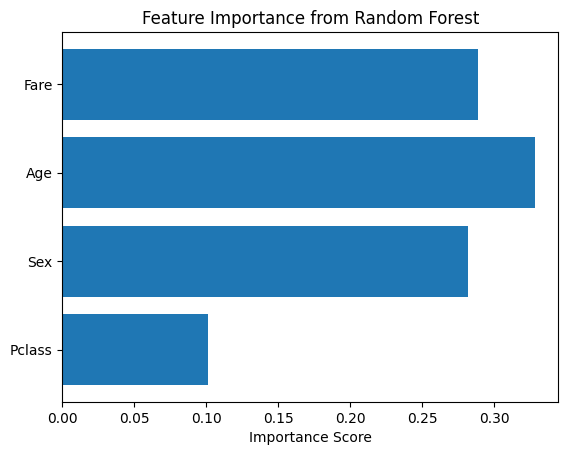

In [4]:
import matplotlib.pyplot as plt

importances = forest.feature_importances_
features = X.columns

plt.barh(features, importances)
plt.xlabel("Importance Score")
plt.title("Feature Importance from Random Forest")
plt.show()